# Computational Dynamics, Astrodynamics

## Exercise 2

### TASK 1

#### Despoina Charitopoulou

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


In [25]:
# Initial conditions
mu = 398600.433 #km^3/s^2
R_earth = 6378 #km
M_sat = 400000 #kg
H = 400 #km 

a=R_earth + H
x0=0
y0=a
r0=np.sqrt(x0**2 + y0**2)
vx0=-np.sqrt(mu/r0)
vy0=0

T = 2*(np.pi)*np.sqrt(a**3/mu)


print("T =",T,"sec")

T = 5553.455958262378 sec


In [26]:
#Convert Cartesian elements to Keplerian.
def cart2kep(cart, GM):
    x,y,vx,vy = cart
    
    r = np.sqrt(x*x+y*y)
    rx = x
    ry = y 
    
    v = np.sqrt(vx*vx+vy*vy)
    E = (1/2)*v*v  - (GM/r)
    a = -GM/(2*E)

    ex = (1/GM)*((v*v-GM/r)*rx - (rx*vx + ry*vy)*vx)
    ey = (1/GM)*((v*v-GM/r)*ry - (rx*vx + ry*vy)*vy)
    
    e = np.sqrt(ex*ex+ey*ey)
    
   
    return [a,e]


In [27]:
# right-hand side of two body problem in cartesian coordinates
def rhs_2bp(t , X):
    x, y, vx, vy = X
    r = np.sqrt(x**2+y**2)
    r3 = r*r*r
    x_dot = vx
    y_dot = vy
    
    vx_dot = - mu*x/r3 
    vy_dot = - mu*y/r3 
    
    return [x_dot, y_dot, vx_dot, vy_dot]

In [28]:
I = [x0, y0, vx0, vy0 ];
INT = rhs_2bp(T,I);

print("xdot=",INT[0])
print("ydot=",INT[1])
print("vxdot=",INT[2])
print("vydot=",INT[3])


xdot= -7.668635590546473
ydot= 0
vxdot= -0.0
vydot= -0.008676301537414584


In [29]:
t0=0.0
tmax = 6000*T;

# solve 2-body problem in cartesian coordinates
sol = solve_ivp(rhs_2bp, [t0, tmax], I ,t_eval=np.linspace(0,tmax,6000) ,method='DOP853',atol=1e-13,rtol=1e-13)

for i in range(0, len(sol.t)):
    car = sol.y[:,i]
    coe = cart2kep(car,mu)
    r1 = np.array(np.sqrt((np.array(sol.y[0]))**2 + (np.array(sol.y[1]))**2))
    err = (abs(((r1 - R_earth)-H)/H))
    h=coe[0] - R_earth

error = abs((h-H)/H)*100
print("The relative error of the height is  = ",error,"%")

The relative error of the height is  =  2.202568794018589e-08 %


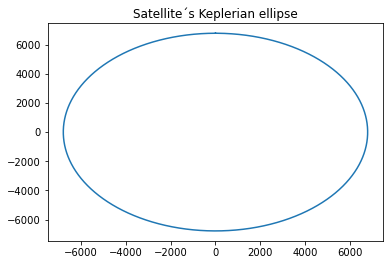

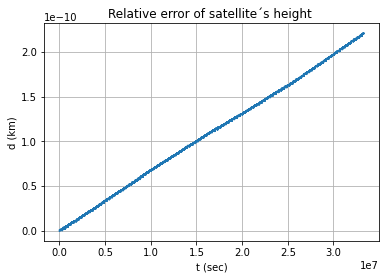

In [30]:
plt.figure(1)
plt.plot(sol.y[0],sol.y[1])
plt.title('Satellite΄s Keplerian ellipse')
plt.show()

plt.figure(2)
plt.plot(sol.t,err)
plt.title('Relative error of satellite΄s height ')
plt.xlabel('t (sec)')
plt.ylabel('d (km)')
plt.grid()
plt.show()

#### We can confirm the stability of the satellite since the error of its height is very small and so the orbit of the satellite is stable.

### TASK 2

In [31]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


mu = 398600.433 #km^3/s^2
R_earth = 6378 #km
M_sat = 400000 #kg
H = 400 #km 

a=R_earth + H
x0=0
y0=a
r0=np.sqrt(x0**2 + y0**2)
vx0=-np.sqrt(mu/r0)
vy0=0
T = 2*(np.pi)*np.sqrt(a**3/mu)


In [32]:
def h(r):
    rs=r-R_earth
    return rs

# density of Earth's atmosphere
def rho(h):
    if h>15:
        r_o=(0.1*h)**(-7.5)
    else:
        r_o=0.1
        
        
    return r_o
    

# right-hard side of perturbed two body problem in cartesian coordinates
def rhs_2bp_pert(t , X):
    x, y, vx, vy = X
    mu = 398600.433 #km^3/s^2
    S=8000   #m^2
    C=1.5
    M_sat=400000  #kg
    
    r = np.sqrt(x**2+y**2)
    v = np.sqrt(vx**2+vy**2)
    r3 = r*r*r
    x_dot = vx
    y_dot = vy
    px = - (rho(h(r)))*(vx*v)*C*S/(2*M_sat*0.001)
    py = - (rho(h(r)))*(vy*v)*C*S/(2*M_sat*0.001)
    vx_dot = - mu*x/r3 + px
    vy_dot = - mu*y/r3 + py 
    
    return [x_dot, y_dot, vx_dot, vy_dot]

def stop_condition(t,X):
    x,y,vx,vy=X
    h=np.sqrt(x**2+y**2)-R_earth
    return h
stop_condition.terminal = True

In [33]:
IB = [x0, y0, vx0, vy0 ];
tmax = 6000*T;

In [34]:
# solve perturbed 2-body problem in cartesian coordinates for aerodynamic drag
solpert = solve_ivp(rhs_2bp_pert,[0, tmax] ,IB ,t_eval=np.linspace(0,tmax,6000),events=stop_condition,method='DOP853',atol=1e-13,rtol=1e-13)

for i in range(0, len(solpert.t)):
    r_n = np.array(np.sqrt((np.array(solpert.y[0]))**2 + (np.array(solpert.y[1]))**2))


print("The time for satellite's fall in Earth's surface = ",solpert.t[-1]," sec")

The time for satellite's fall in Earth's surface =  31371147.776895393  sec


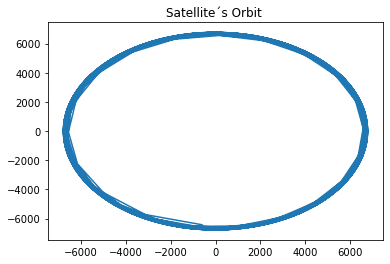

In [35]:
t_eval=np.linspace(0,tmax,6000)

plt.figure(1)
plt.plot(solpert.y[0],solpert.y[1])
plt.title('Satellite΄s Orbit ')
plt.show()

### Gauss Equation

In [36]:
def h(r):
    rs=r-R_earth
    return rs

# density of Earth's atmosphere
def rho(h):
    if h>15:
        r_o=(10**9)*(0.1*h)**(-7.5)
    else:
        r_o=0.1*(10**9)
        
        
    return r_o

def gauss(t , X):
    x, y, vx, vy = X
    mu = 398600.433 #km^3/s^2
    S=8000*(0.001**2)   #km^2
    C=1.5
    M_sat=400000  #kg
    R_earth = 6378 #km
    H = 400 #km 
    a=R_earth + H
    
    r = np.sqrt(x**2+y**2)
    v = np.sqrt(vx**2+vy**2)
    
    a_dot = - ((rho(h(r)))*(np.sqrt(mu*r))*C*S)/M_sat
    
    return a_dot

def stop_condition2(t,X):
    x,y,vx,vy=X
    h=np.sqrt(x**2+y**2)-R_earth
    return h
stop_condition2.terminal = True

In [37]:
a=R_earth + H
x0=0
y0=a
r0=np.sqrt(x0**2 + y0**2)
vx0=-np.sqrt(mu/r0)
vy0=0
IC = [x0, y0, vx0, vy0 ];
tmax = 6000*T;

In [38]:
# solve perturbed 2-body problem in cartesian coordinates - Gauss equation
solg = solve_ivp(gauss,[0, tmax] ,IC ,t_eval=np.linspace(0,tmax,6000),events=stop_condition2,method='RK45',atol=1e-13,rtol=1e-13)
   

print("The time for satellite's fall in Earth's surface according to Gauss΄s equation is = ",solg.t[-1]," sec")
print("The time for satellite's fall in Earth's surface according to the numerical integration is = ",solpert.t[-1]," sec")
Error=(abs(solg.t[-1]-solpert.t[-1])/solg.t[-1])*100
print("The relative error of the two times is = ", Error, " %")

The time for satellite's fall in Earth's surface according to Gauss΄s equation is =  31571105.51768297  sec
The time for satellite's fall in Earth's surface according to the numerical integration is =  31371147.776895393  sec
The relative error of the two times is =  0.6333567909922591  %


### TASK 3
#### Solar radiation pressure

In [39]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


mu = 398600.433*(1000**3) #m^3/s^2
R_earth = 6378*1000 #m
M_sat = 400000 #kg
H = 400*1000 #m 
c=2.99*10**8 #m/s
a=R_earth + H
x0=0
y0=a
r0=np.sqrt(x0**2 + y0**2)
vx0=-np.sqrt(mu/r0)
vy0=0

T = 2*(np.pi)*np.sqrt(a**3/mu)


In [40]:
#Convert Cartesian elements to Keplerian.
def cart2kep(cart, mu):
    x,y,vx,vy = cart
    
    r = np.sqrt(x*x+y*y)
    rx = x
    ry = y 
    
    v = np.sqrt(vx*vx+vy*vy)
    E = (1/2)*v*v  - (mu/r)
    a = -mu/(2*E)

    ex = (1/mu)*((v*v-mu/r)*rx - (rx*vx + ry*vy)*vx)
    ey = (1/mu)*((v*v-mu/r)*ry - (rx*vx + ry*vy)*vy)
    
    e = np.sqrt(ex*ex+ey*ey)
    
   
    return [a,e]

In [41]:
# no Earth's shadow 
def rhs_2bp_pertsun_no(t , X):
    x, y, vx, vy = X
    mu = 398600.433*(1000**3) #m^3/s^2
    S=8000  #m^2
    C=1.5
    n=np.deg2rad(1)/(24*3600)
    AU=149597871*1000 #m
    Phi=1368 #W/m^2
    c=2.99*10**8 #m/s
    
    r = np.sqrt(x**2+y**2)
    v = np.sqrt(vx**2+vy**2)
    r3 = r*r*r
    x_dot = vx
    y_dot = vy
    
    x_s=AU*np.cos(n*t)
    y_s=AU*np.sin(n*t)
    r_s=np.sqrt((x-x_s)**2+(y-y_s)**2)
    
    px = - (Phi*C*S/(M_sat*c))*((x-x_s)/r_s)
    py = - (Phi*C*S/(M_sat*c))*((y-y_s)/r_s)
    
    vx_dot = - mu*x/r3 + px
    vy_dot = - mu*y/r3 + py 
    
    return [x_dot, y_dot, vx_dot, vy_dot]

In [42]:
# with Earth's shadow 
def rhs_2bp_pertsun_sh(t , X):
    x, y, vx, vy = X
    mu = 398600.433*(1000**3) #m^3/s^2
    S=8000   #m^2
    C=1.5
    n=np.deg2rad(1)/(24*3600)
    AU=149597871*1000 #m
    Phi=1368 #W/m^2
    
    r = np.sqrt(x**2+y**2)
    r_xy=[x,y]
    v = np.sqrt(vx**2+vy**2)
    r3 = r*r*r
    x_dot = vx
    y_dot = vy
    
    x_s=AU*np.cos(n*t)
    y_s=AU*np.sin(n*t)
    r_xys=[x_s,y_s]
    r_s=np.sqrt((x-x_s)**2+(y-y_s)**2)
    
    AB=np.sqrt(r**2 - ((np.inner(r_xy, r_xys))/r_s)**2)
    
    if AB<R_earth and np.inner(r_xy, r_xys)<0:
        sh=0
    else:
        sh=1
        
    
    px = - (sh*Phi*C*S/(M_sat*c))*((x-x_s)/r_s)
    py = - (sh*Phi*C*S/(M_sat*c))*((y-y_s)/r_s)
    
    vx_dot = - mu*x/r3 + px
    vy_dot = - mu*y/r3 + py 
    
    return [x_dot, y_dot, vx_dot, vy_dot]

In [43]:
ID = [x0, y0, vx0, vy0 ];
tmax = 6000*T;

In [44]:
# solve perturbed 2-body problem in cartesian coordinates for solar radiation pressure with no Earth's shadow 
sol1 = solve_ivp(rhs_2bp_pertsun_no,[0, tmax] ,ID ,t_eval=np.linspace(0,tmax,60000),method='DOP853',atol=1e-10,rtol=1e-10)

car1=np.zeros((2,np.size(sol1.t)))
for i in range(0, len(sol1.t)):
    car1[:,i] = cart2kep(sol1.y[:,i],mu)
    

In [45]:
# solve perturbed 2-body problem in cartesian coordinates for solar radiation pressure with Earth's shadow 
sol2 = solve_ivp(rhs_2bp_pertsun_sh,[0, tmax] ,ID ,t_eval=np.linspace(0,tmax,60000),method='DOP853',atol=1e-10,rtol=1e-10)

car2=np.zeros((2,np.size(sol2.t)))
for i in range(0, len(sol2.t)):
    car2[:,i] = cart2kep(sol2.y[:,i],mu)
    

C:\Users\des_p\AppData\Local\Temp/ipykernel_10712/1768885060.py:23: RuntimeWarning: invalid value encountered in sqrt
  AB=np.sqrt(r**2 - ((np.inner(r_xy, r_xys))/r_s)**2)


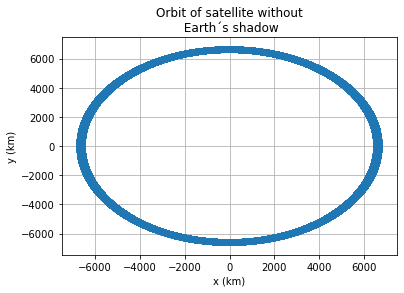

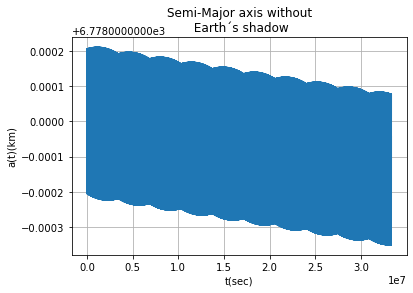

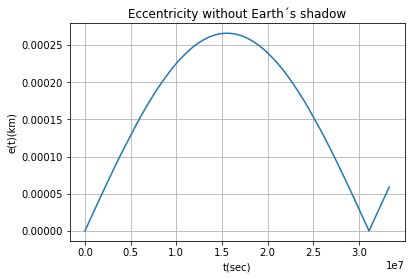

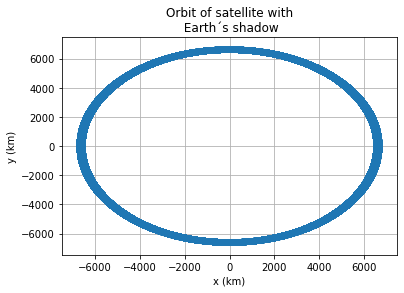

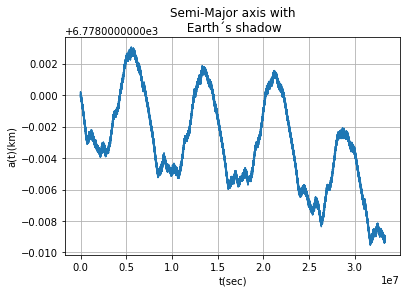

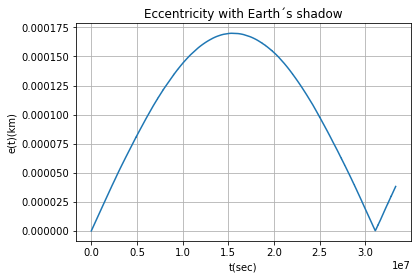

In [46]:
plt.figure(1)
plt.plot(sol1.y[0]/1000,sol1.y[1]/1000) # we divide with 1000 to convert the axis to km instead of m
plt.title('Orbit of satellite without\n Earth΄s shadow')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.grid()
plt.show()

plt.figure(2)
plt.plot(sol1.t,car1[0]/1000)
plt.title('Semi-Major axis without\n Earth΄s shadow')
plt.xlabel('t(sec)')
plt.ylabel('a(t)(km)')
plt.grid()
plt.show()

plt.figure(3)
plt.plot(sol1.t,car1[1])
plt.title('Eccentricity without Earth΄s shadow')
plt.xlabel('t(sec)')
plt.ylabel('e(t)(km)')
plt.grid()
plt.show()

plt.figure(4)
plt.plot(sol2.y[0]/1000,sol2.y[1]/1000)
plt.title('Orbit of satellite with\n Earth΄s shadow')
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.grid()
plt.show()

plt.figure(5)
plt.plot(sol2.t,car2[0]/1000)
plt.title('Semi-Major axis with\n Earth΄s shadow')
plt.xlabel('t(sec)')
plt.ylabel('a(t)(km)')
plt.grid()
plt.show()

plt.figure(6)
plt.plot(sol2.t,car2[1])
plt.title('Eccentricity with Earth΄s shadow')
plt.xlabel('t(sec)')
plt.ylabel('e(t)(km)')
plt.grid()
plt.show()

#### We observe that the figures of the eccentricity almost stay the same whereas  the figures of the semi-major axis are slightly different since  we see that when we take into account the Earth's shadow   the semi-major axis is one magnitude larger.